In [1]:
import numpy as np
import pandas as pd
import h5py

# Suppress FutureWarnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Find SMEAGOL
import sys
sys.path.append('../../SMEAGOL')

from smeagol.matrices import *
from smeagol.visualize import *

np.random.seed(0)

In [2]:
def get_rep_mats(sel_pwms, max_clusters=5, threshold=.2):
    n_clusters = 1
    min_ncorr = np.min(pairwise_ncorrs(list(sel_pwms.weights)))
    if min_ncorr > threshold:
        choice = {'reps': choose_representative_pm(sel_pwms),
                  'min_ncorr': min_ncorr}
    else:
        while ((n_clusters < max_clusters) & (min_ncorr <= threshold)):
            n_clusters += 1
            choice = cluster_pms(sel_pwms, n_clusters=n_clusters)
            min_ncorr = np.min(choice['min_ncorr'])
        #for i in range(n_clusters):
            #print(sel_pwms.Matrix_id[choice['clusters']==i].values)
    return choice

## Load PWMs

In [3]:
pwms = pd.read_hdf('../DATA/PWMS/attract_rbpdb_encode_filtered_human_pwms.h5', key='data')
len(pwms)

362

In [4]:
len(np.unique(pwms.Gene_name))

146

## Select RBPs with multiple PWMs

In [5]:
rbp_counts = pwms.Gene_name.value_counts()
multi_rbps = np.array(rbp_counts[rbp_counts > 1].index)
print(multi_rbps)
print(len(multi_rbps))

['SRSF1' 'SRSF2' 'SNRPA' 'ZFP36' 'HNRNPDL' 'ELAVL1' 'MBNL1' 'TIA1'
 'HNRNPK' 'KHSRP' 'SRSF9' 'SRSF10' 'TIAL1' 'SFPQ' 'ELAVL2' 'NOVA1' 'SRSF7'
 'MSI1' 'FMR1' 'HNRNPA1' 'PUM1' 'RBM45' 'SRSF5' 'HNRNPL' 'KHDRBS3' 'PUM2'
 'RBMS3' 'RBM6' 'YBX1' 'HNRNPH2' 'FUBP3' 'HNRNPC' 'DAZ3' 'RBFOX1' 'ZRANB2'
 'TARDBP' 'PTBP1' 'PRR3' 'EIF4G2' 'RBM24' 'PCBP2' 'QKI' 'SRSF3' 'EIF4B'
 'HNRNPA2B1' 'KHDRBS1' 'RBM5' 'DAZAP1' 'PCBP4' 'SF1' 'PABPC1' 'RBM4B'
 'NUPL2' 'UNK' 'TAF15' 'BOLL' 'HNRNPCL1' 'ELAVL4' 'TRNAU1AP' 'FUBP1'
 'CELF1' 'SRSF6' 'A1CF' 'IGF2BP1' 'LIN28A' 'HNRNPF' 'ZCRB1' 'IGF2BP2'
 'CELF2' 'RBM4' 'NOVA2' 'PCBP1' 'PUF60' 'HNRNPLL' 'HNRNPA0' 'RBM47'
 'RC3H1' 'RBMY1A1' 'FUS' 'ZNF326' 'RBM41' 'KHDRBS2' 'RBM14' 'CNOT4']
84


In [11]:
# Similarity metric: normalized correlation
# Clustering method: Hierarchical (agglomerative) clustering
# Threshold for clustering: minimum pairwise similarity < 0.2

In [6]:
rep_Matrix_ids = []
for rbp in multi_rbps:
    sel_pwms = pwms[pwms.Gene_name==rbp].reset_index(drop=True)
    np.array(sel_pwms.Matrix_id)
    choice = get_rep_mats(sel_pwms)
    rep_Matrix_ids.append(choice['reps'])

In [7]:
len(rep_Matrix_ids)

84

In [16]:
sum([type(x)==list for x in rep_Matrix_ids])

18

## ELAVL1

In [17]:
sel_pwms = pwms[pwms.Gene_name=='ELAVL1'].reset_index(drop=True)
np.array(sel_pwms.Matrix_id)

array(['M108_0.6', 'M112_0.6', 'M232_0.6', 's101', 'M031_0.6', 'M127_0.6',
       '1170'], dtype=object)

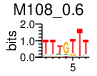

In [39]:
plot_ppm(sel_pwms, 'M108_0.6', 5)

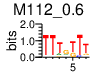

In [40]:
plot_ppm(sel_pwms, 'M112_0.6', 5)

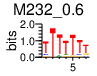

In [41]:
plot_ppm(sel_pwms, 'M232_0.6', 5)

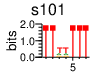

In [42]:
plot_ppm(sel_pwms, 's101', 5)

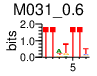

In [43]:
plot_ppm(sel_pwms, 'M031_0.6', 5)

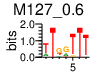

In [44]:
plot_ppm(sel_pwms, 'M127_0.6', 5)

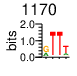

In [45]:
plot_pwm(sel_pwms, '1170', 5)

In [18]:
choice = get_rep_mats(sel_pwms)
print(choice)

{'reps': 'M127_0.6', 'min_ncorr': 0.3500929521465199}


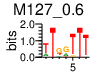

In [62]:
plot_ppm(sel_pwms, choice, 5)

In [19]:
rep_Matrix_ids.append('M232_0.6')

## EIF4B

In [20]:
sel_pwms = pwms[pwms.Gene_name=='EIF4B'].reset_index(drop=True)
np.array(sel_pwms.Matrix_id)

array(['M290_0.6', '351', '352'], dtype=object)

In [22]:
print(np.min(pairwise_ncorrs(list(sel_pwms.weights))))

0.41198813809787366


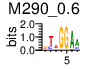

In [264]:
plot_ppm(sel_pwms, 'M290_0.6', 4)

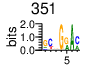

In [265]:
plot_ppm(sel_pwms, '351', 4)

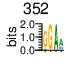

In [266]:
plot_ppm(sel_pwms, '352', 4)

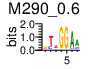

In [24]:
choice = choose_representative_pm(sel_pwms)
plot_pwm(sel_pwms, choice, 4)

In [25]:
rep_Matrix_ids.append('352')

## Final list of representative PWMs

In [26]:
rep_Matrix_ids = list(pd.core.common.flatten(rep_Matrix_ids))
print(len(rep_Matrix_ids))

112


In [27]:
rep_Matrix_ids[:5]

['M104_0.6', '1393', 's22', 'M273_0.6', 'M274_0.6']

In [28]:
single_pwms = pwms[~pwms.Gene_name.isin(rbp_counts[rbp_counts > 1].index)]

In [29]:
representative_multi_pwms = pwms[pwms.Matrix_id.isin(rep_Matrix_ids)]

In [30]:
representative_pwms = pd.concat([single_pwms, representative_multi_pwms]).reset_index(drop=True)

In [31]:
len(representative_pwms)

174

In [32]:
len(representative_pwms.Gene_name.unique())

146

In [33]:
len(pwms.Gene_name.unique())

146

In [34]:
set(pwms.Gene_name) - set(representative_pwms.Gene_name)

set()

In [35]:
representative_pwms.Gene_name.value_counts()

SRSF2      5
SRSF1      4
HNRNPDL    3
SNRPA      3
ZFP36      3
          ..
G3BP1      1
ESRP2      1
PABPC4     1
RBM24      1
YBX1       1
Name: Gene_name, Length: 146, dtype: int64

## Save list

In [36]:
representative_pwms.Matrix_id.to_csv('../DATA/PWMs/attract_rbpdb_encode_representative_matrices.txt', index=False, header=False)